In [103]:
import os
import task
import configs
from collections import OrderedDict
import numpy as np
import tools
import train
import standard.analysis as sa
import pickle
import model as network_models
import standard.analysis_activity as analysis_activity

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [105]:
def load_activity(save_path):
    import tensorflow as tf
    # # Reload the network and analyze activity
    config = tools.load_config(save_path)
    train_x, train_y, val_x, val_y = task.load_data(config.dataset, config.data_dir)

    tf.reset_default_graph()
    CurrentModel = network_models.RNN
    val_x_ph = tf.placeholder(val_x.dtype, val_x.shape)
    val_y_ph = tf.placeholder(val_y.dtype, val_y.shape)
    model = CurrentModel(val_x_ph, val_y_ph, config=config, training=False)
    model.save_path = save_path

    tf_config = tf.ConfigProto()
    tf_config.gpu_options.allow_growth = True
    with tf.Session(config=tf_config) as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(tf.local_variables_initializer())
        model.load()
        rnn_outputs = sess.run(model.rnn_outputs, {val_x_ph: val_x, val_y_ph: val_y})
    return rnn_outputs

In [107]:
path = './files_temp/RNN_3layer'
# t(temp_rnn(), path, s=0, e=100)

dir_ix = 0
var_name = 'w_rnn'
dirs = [os.path.join(path, n) for n in os.listdir(path)]
save_path = dirs[dir_ix]
config = tools.load_config(save_path)
rnn_outputs = load_activity(save_path)
w_rnns = tools.load_pickle(path, var_name)
w_rnn = w_rnns[dir_ix]

INFO:tensorflow:Restoring parameters from ./files_temp/RNN_3layer\000000\model.ckpt
Model restored from path: ./files_temp/RNN_3layer\000000\model.ckpt


In [108]:
N_OR = config.N_ORN
N_ORN = config.N_ORN * config.N_ORN_DUPLICATION

In [109]:
pn = np.mean(rnn_outputs[1], axis=0)
ix = np.argsort(pn)[::-1]
pn_cutoff= np.argmax(pn[ix] < 1)
pn_ix = ix[:pn_cutoff]
pn_cutoff

50

In [110]:
pn1 = np.mean(rnn_outputs[2], axis=0)
ix1 = np.argsort(pn1)[::-1]
pn1_cutoff= np.argmax(pn1[ix1] < 1)
pn1_ix = ix1[:pn1_cutoff]
pn1_cutoff

50

In [128]:
pn_to_pn1 = w_rnn[pn1_ix[:,None], pn_ix]

ind_max = np.argmax(pn_to_pn1, axis=1)
ind_sort = np.argsort(ind_max)
pn_to_pn1_reshaped = pn_to_pn1[ind_sort,:]

(-0.5, 49.5, 49.5, -0.5)

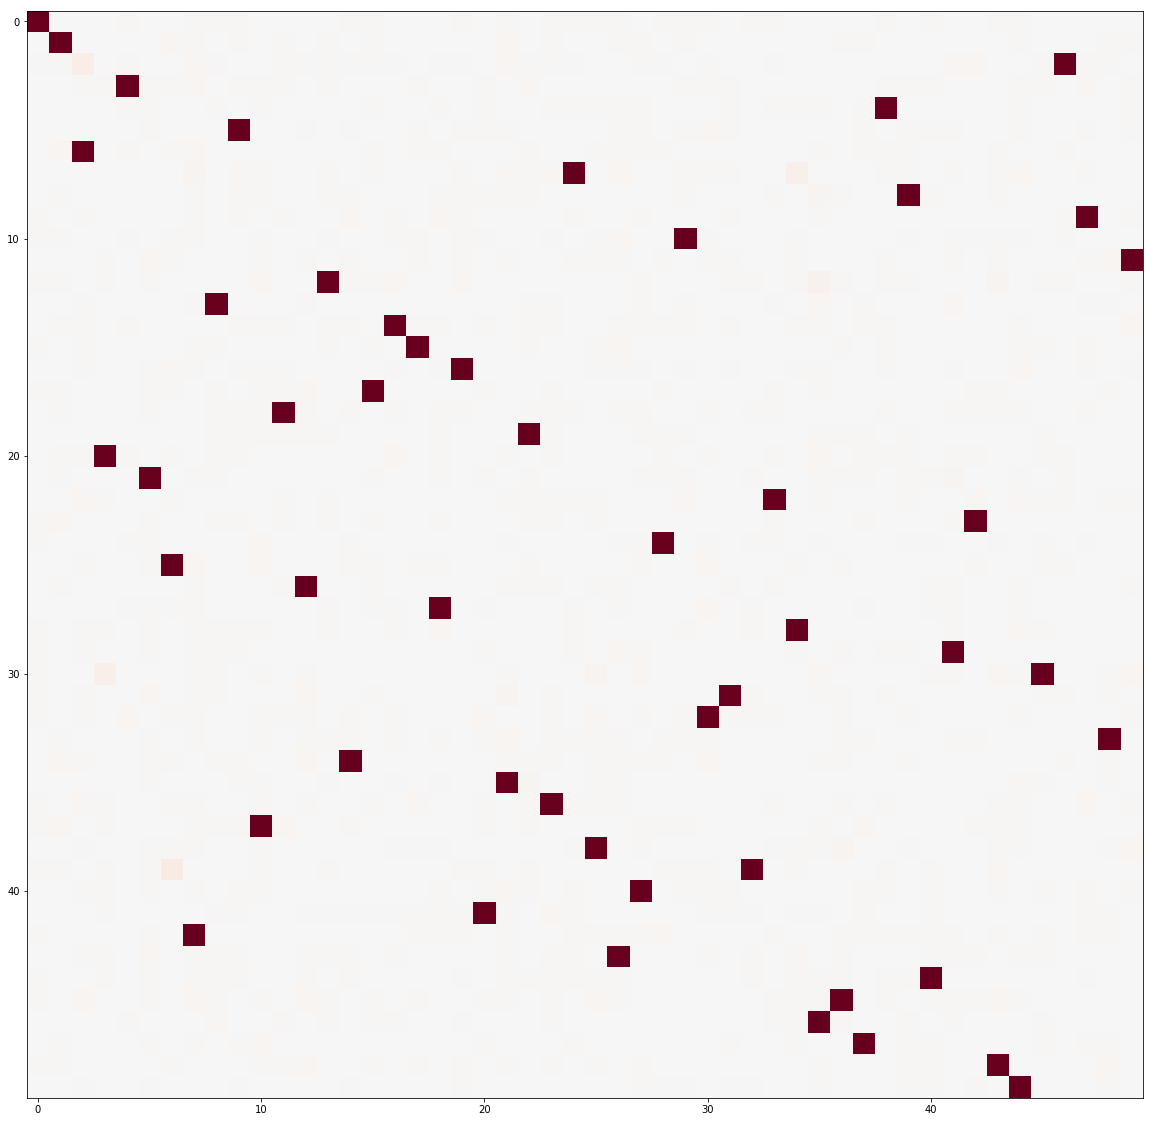

In [114]:
fig=plt.figure(figsize=(20, 20))
plt.imshow(w_rnn[ix[:50,None],ix1[:50]], cmap ='RdBu_r', vmin=-.5, vmax=.5)
plt.axis('tight')

(-0.5, 2499.5, 8191.5, -0.5)

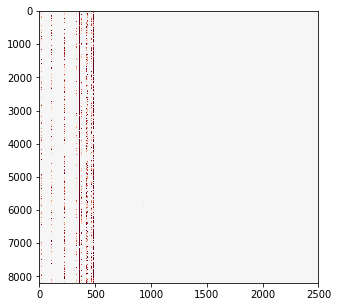

In [115]:
fig=plt.figure(figsize=(5, 5))
plt.imshow(rnn_outputs[1][:,:], cmap ='RdBu_r', vmin=-.5, vmax=.5)
plt.axis('tight')

(-0.5, 89.5, 8191.5, -0.5)

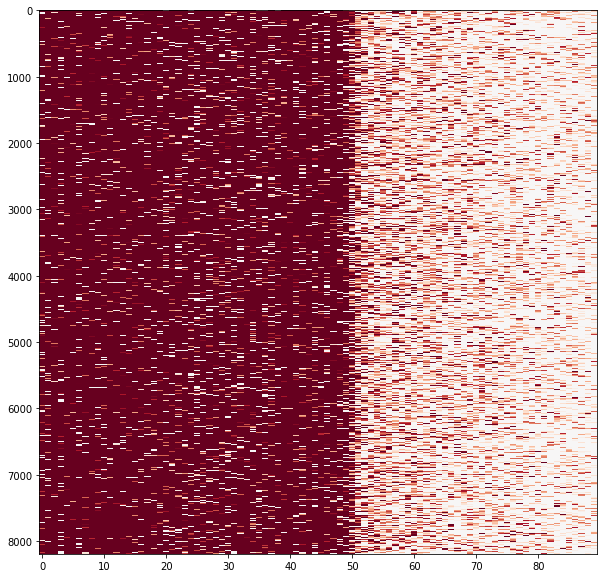

In [122]:
fig=plt.figure(figsize=(10, 10))
plt.imshow(rnn_outputs[1][:,ix[:90]], cmap ='RdBu_r', vmin=-.5, vmax=.5)
plt.axis('tight')

In [123]:
np.sum(pn_ix < 500)

50

In [124]:
pn1_ix

array([ 222,  102,  478,  435,   89,  228,  303,  112,  409,  150,    3,
        329,  487,  184,  466,   75,  328,  457,  370,  336,  496,  166,
        659,   10,  394,  124,  434,  380,   22, 1092,  349,  470,  387,
        363,   17,  140,  108,  261, 1225, 1830,  477, 2198,   60,  241,
        224,  425, 1046, 1677,  871, 1557], dtype=int64)

(-0.5, 2499.5, 8191.5, -0.5)

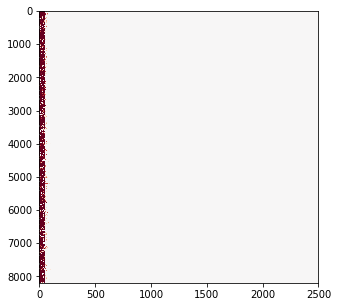

In [125]:
fig=plt.figure(figsize=(5, 5))
plt.imshow(rnn_outputs[2][:,ix1], cmap ='RdBu_r', vmin=-.5, vmax=.5)
plt.axis('tight')

(-0.5, 49.5, 49.5, -0.5)

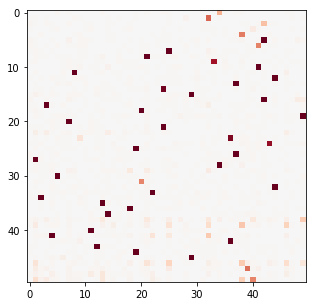

In [129]:
fig=plt.figure(figsize=(5, 5))
plt.imshow(pn_to_pn1, cmap ='RdBu_r', vmin=-.5, vmax=.5)
plt.axis('tight')

(-0.5, 49.5, 49.5, -0.5)

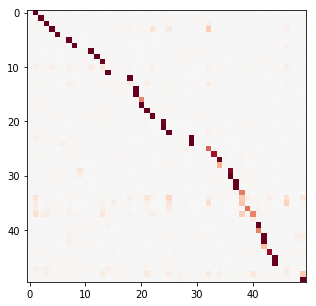

In [130]:
fig=plt.figure(figsize=(5, 5))
plt.imshow(pn_to_pn1_reshaped, cmap ='RdBu_r', vmin=-.5, vmax=.5)
plt.axis('tight')

(-0.5, 2499.5, 49.5, -0.5)

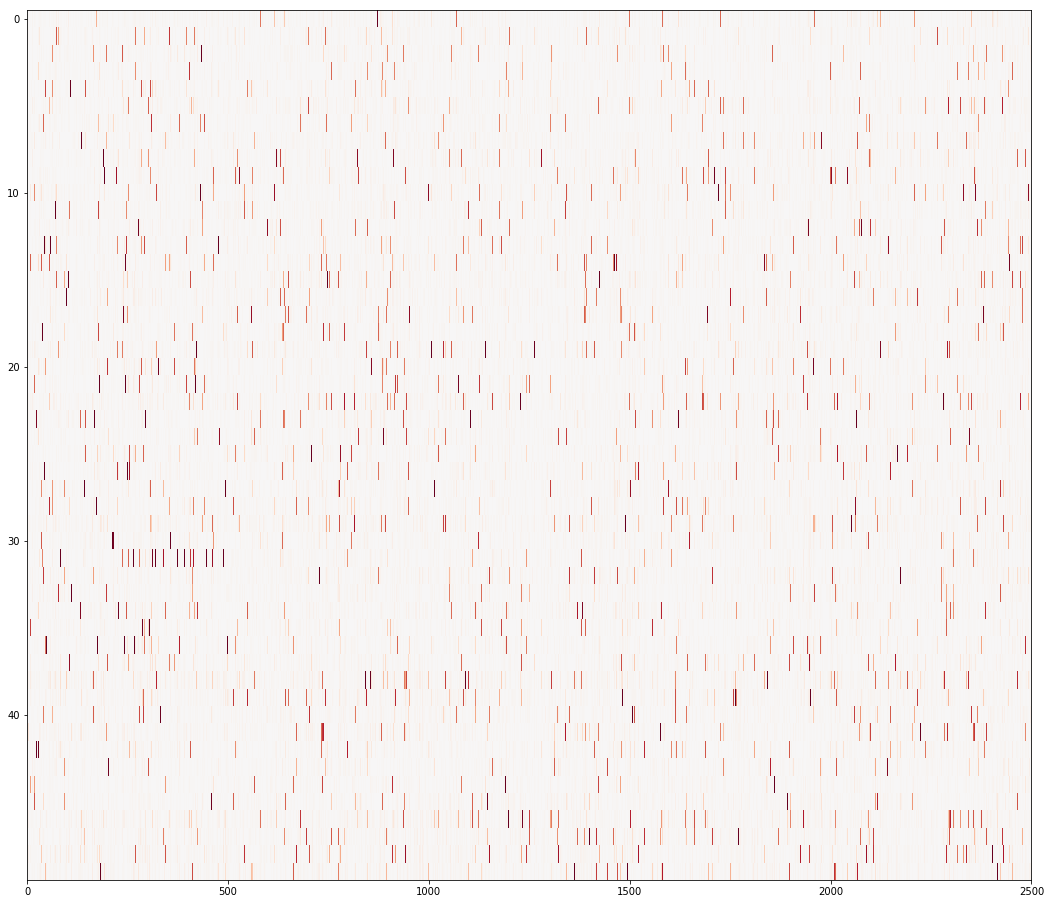

In [132]:
fig=plt.figure(figsize=(18, 16))
plt.imshow(w_rnn[pn1_ix,:], cmap ='RdBu_r', vmin=-.5, vmax=.5)
plt.axis('tight')

(-0.5, 49.5, 499.5, -0.5)

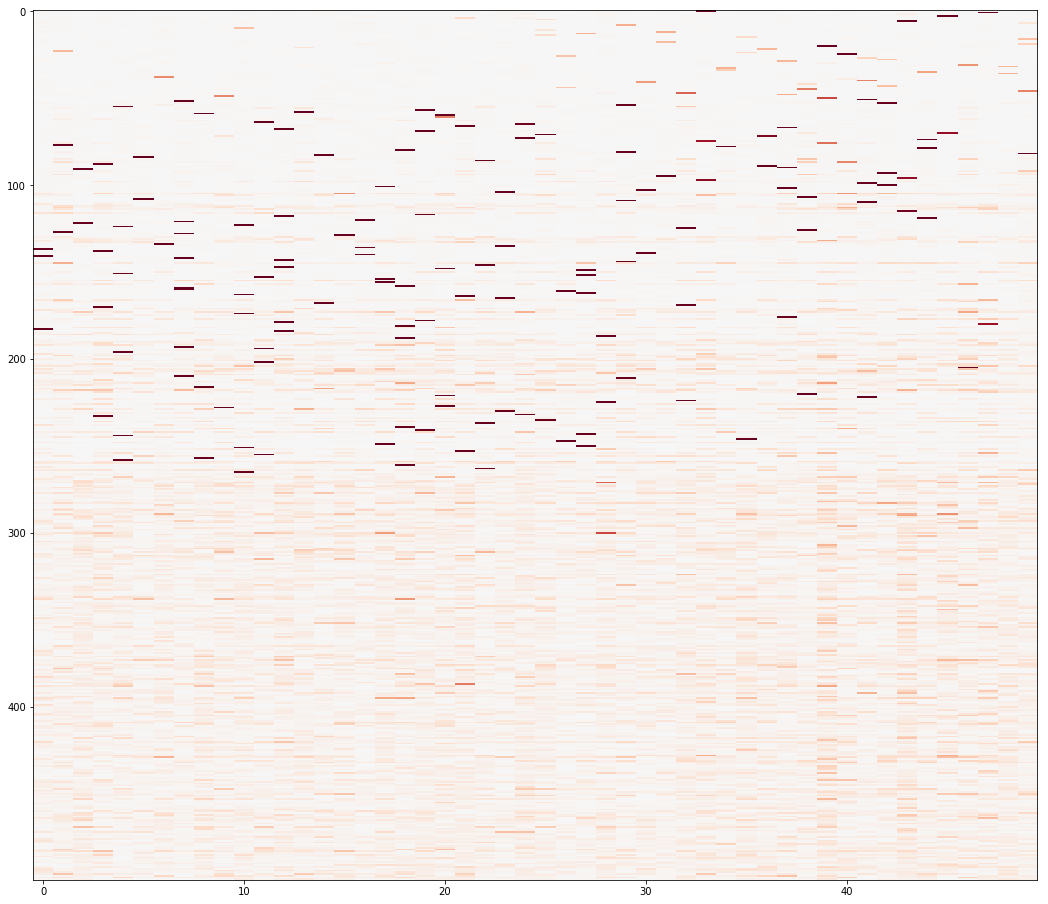

In [133]:
fig=plt.figure(figsize=(18, 16))
plt.imshow(w_rnn[ix[:500,None],pn_ix], cmap ='RdBu_r', vmin=-.5, vmax=.5)
plt.axis('tight')

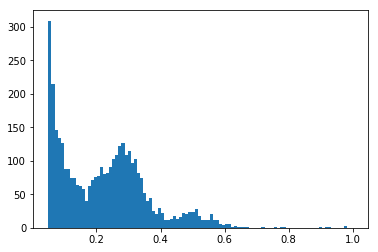

In [135]:
w_glo = w_rnn[pn1_ix,:]
_ = plt.hist(w_glo.flatten(), bins= 100, range=[0.05, 1], density=False)

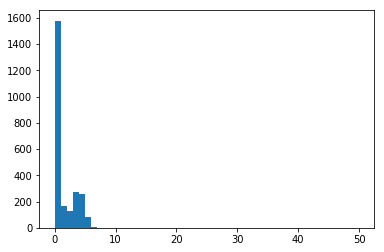

In [136]:
threshold = 0.1
claw_count = np.sum(w_glo>threshold,axis=0)
_ = plt.hist(claw_count, bins=N_OR, range=[0, N_OR], density=False)

(-0.5, 2499.5, 8191.5, -0.5)

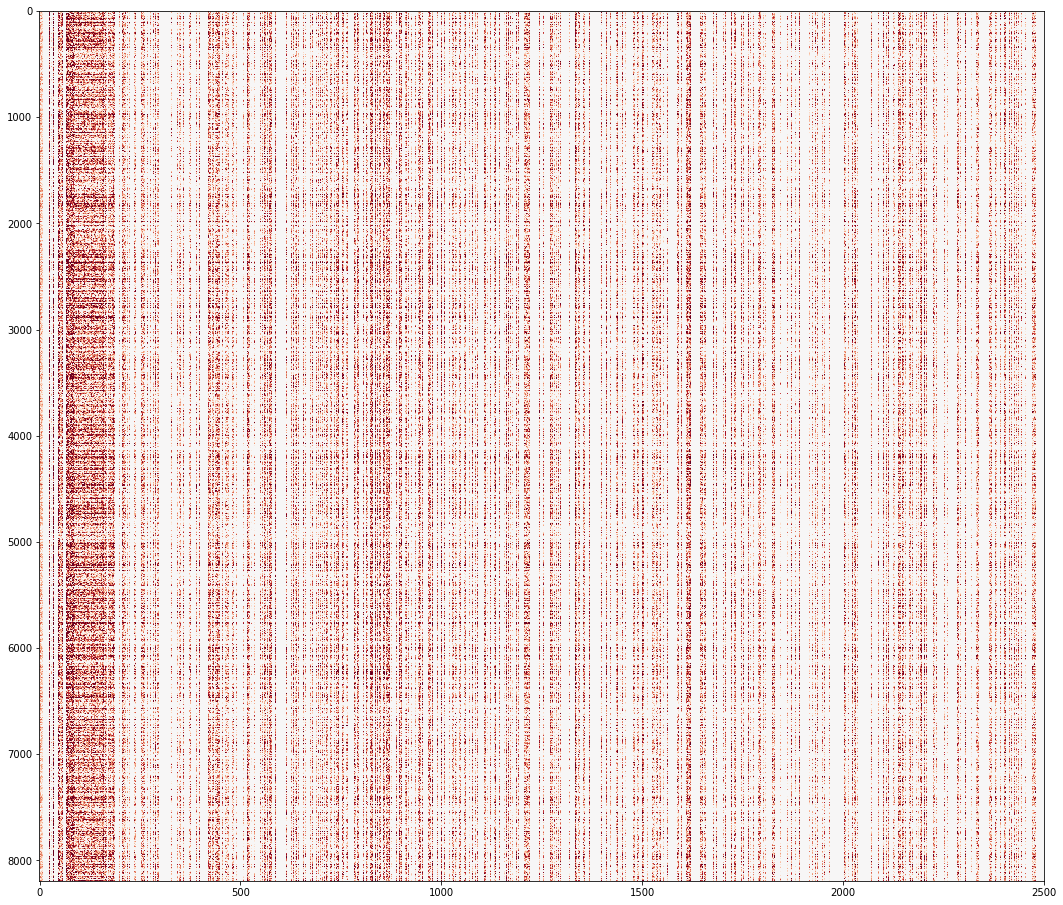

In [137]:
fig=plt.figure(figsize=(18, 16))
plt.imshow(rnn_outputs[3][:, ix1], cmap ='RdBu_r', vmin=-2, vmax=2)
plt.axis('tight')